# Scatter plot

Given a dataset of two random variables $X_1$ and $X_2$, the easiest way to visualize their relationship is by drawing a scatter plot. In this notebook, we will discuss how to generate scatter plot in Python.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pandas as pd
from sklearn import datasets

%matplotlib inline
np.set_printoptions(precision=2,suppress=True)
iris = datasets.load_iris()

## Table of contents
- [Bivariate: basic form](#Bivariate_SP)
- [Multivariate variations](#Multivariate_SP)    

### 2.1 Bivariate: basic form <a name="Bivariate_SP"></a>
To give an example, let's consider the iris dataset. We choose sepal length and width as the variable $X_1$ and $X_2$, respectively. In Python, we can use `matplotlib.pyplot.scatter` to generate the scatter plot of those two variables.

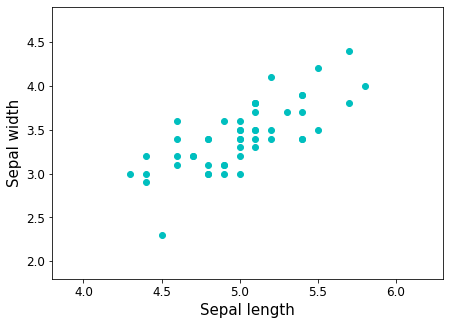

In [23]:
# Basic two-variable scatter plot (Iris dataset)
X = iris.data[:50, :2]    # Select the first two features

# Axis limit
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

fig, ax = plt.subplots(figsize=[7,5])
ax.scatter(X[:,0],X[:,1],c='c')
ax.set_xlabel('Sepal length',fontsize=15)
ax.set_ylabel('Sepal width',fontsize=15)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.tick_params(labelsize=12)
# fig.savefig('./Figures/Scatter.png', bbox_inches='tight')

This scatter plot uses dots to represent the data points, where the horizontal and vertical position of each dot indicate the values for sepal length and sepal width, respectively.

A scatter plot is great for identifying the correlation pattern between two numeric variables. As can be spotted in the above figure, the sepal length and the width are positively correlated, i.e., if sepal length is increased, we would have a high chance to observe increased sepal width too.

### 2.2 Multivariate variations <a name="Multivariate_SP"></a>

A basic two-variable scatter plot can be easily extended to incorporate a third variable:
- If the third variable is of categorical type, we can encode it by changing the dot color or shape;
- If the third variable is of numeric type, a common encoding would be varying the dot size.

As an example of adding a categorical variable, we could enrich the two-variable scatter plot with *iris type*. This can be done by passing an extra color argument to the `matplotlib.pyplot.scatter` function.

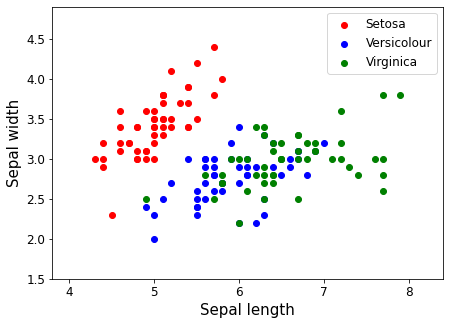

In [29]:
# Three-variable scatter plot (Categorical)
X = iris.data[:, :2]    # Select the first two features
y = iris.target

# Axis limit
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Color by category
cdict = {0: 'red', 1: 'blue', 2: 'green'}
iris_type = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}

fig, ax = plt.subplots(figsize=[7,5])
for g in range(3):
    ix = np.where(y == g)
    ax.scatter(X[ix, 0], X[ix, 1], c=cdict[g], label=iris_type[g])
ax.set_xlabel('Sepal length',fontsize=15)
ax.set_ylabel('Sepal width',fontsize=15)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.tick_params(labelsize=12)
ax.legend(fontsize='large')
# fig.savefig('./Figures/Scatter_categorical.png', bbox_inches='tight')

As an example of adding a numeric variable, let's enrich the two-variable scatter plot with *petal length*. This can be done by passing an extra size argument to the `matplotlib.pyplot.scatter` function.

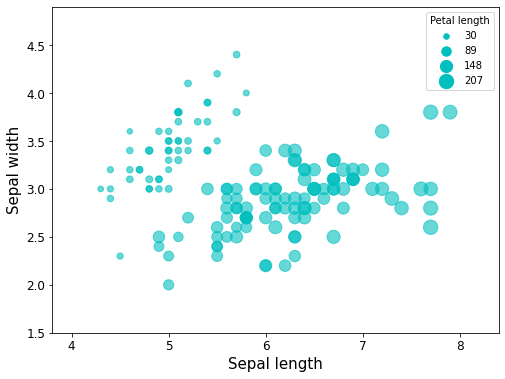

In [67]:
# Three-variable scatter plot (Numeric)
X = iris.data[:, :3]    # Select the first three features

# Specify bubble plot size
size_scale = 30
point_size = size_scale*X[:,2]

# Axis limit
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(X[:,0],X[:,1],c='c',s=point_size,alpha=0.6)
ax.set_xlabel('Sepal length',fontsize=15)
ax.set_ylabel('Sepal width',fontsize=15)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.tick_params(labelsize=12)

# Create bubble chart legend
M = 4      # Number of bins
bins = np.linspace(point_size.min(), point_size.max(), M)
for i,bin in enumerate(bins):
    ax.scatter([],[], c='c', s=bin, label=str(int(bin)))
ax.legend(scatterpoints=1,title="Petal length")

# fig.savefig('./Figures/Scatter_bubblechart.png', bbox_inches='tight')

In this plot, a larger dot indicates a flower sample with a larger petal length value. This type of figure is also known as the bubble chart.

When the dataset contains more than three variables, we could use a **pair plot** to visualize pairwise relationships between variables. This can be achieved by using `seaborn`: first, we use `seaborn.PairGrid` to initialize the plot figure and PairGrid object. Subsequently, we specify what to plot on the diagonal and off-diagonal facets. Here, we consider four variables: *sepal length*, *sepal width*, *petal length*, and *petal width*.

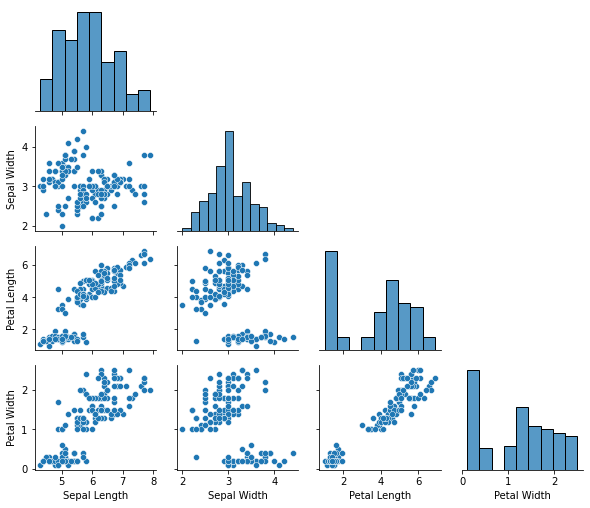

In [90]:
# Four-variable pair plot
X = iris.data      # Select all features
df = pd.DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Pairplot - Seaborn
g = sns.PairGrid(df, diag_sharey=False, corner=True, height=1.8, aspect=1.2)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot);
# g.savefig("./Figures/Scatter_pairplot.png")

As shown above, off-diagonal facets show the scatter plots between different pairs of variables, while histograms of each variable are plotted on diagonal facets.